# Lithium Niobate Terahertz Absorption

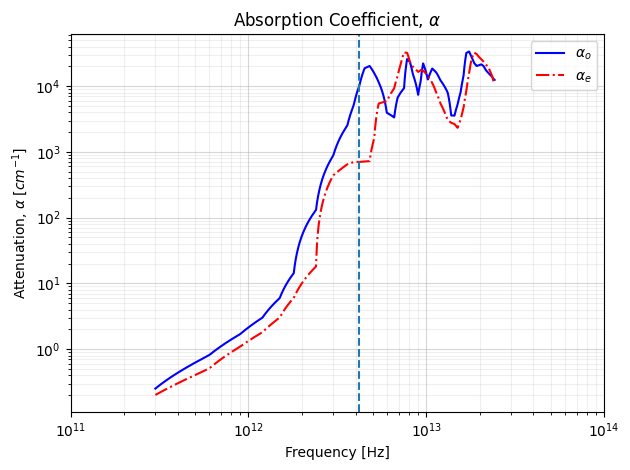

In [2]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import numpy as np
from ln_constants import ln
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt


alpha_ord_int = InterpolatedUnivariateSpline(
    ln["freq"],
    ln["a_ord"],
    k=1,
    ext="extrapolate",
)

alpha_ext_int = InterpolatedUnivariateSpline(
    ln["freq"],
    ln["a_ext"],
    k=1,
    ext="extrapolate",
)

# Determine the cutoff frequency based on waveguide absorption for a 1um thick waveguide
f_samp = np.logspace(np.log10(ln['freq'].min()), np.log10(ln['freq'].max()) - 2, int(1e4))
a_interp = alpha_ord_int(f_samp)
wg_thickness = 1e-4  # cm
alpha_0 = 1 / wg_thickness
cutoff_idx = np.where(np.isclose(a_interp - alpha_0, 200, rtol=1e-1))[0][0]
cutoff = f_samp[cutoff_idx]

fig, ax = plt.subplots()
ax.plot(
    f_samp,
    alpha_ord_int(f_samp),
    linestyle="-",
    color="b",
    label=r"$\alpha_o$",
)
ax.plot(
    f_samp,
    alpha_ext_int(f_samp),
    linestyle="-.",
    color="r",
    label=r"$\alpha_e$",
)
ax.set_title(r"Absorption Coefficient, $\alpha$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"Attenuation, $\alpha$ [$cm^{-1}$]")
ax.set_xlabel(r"Frequency [Hz]")
ax.set_xlim((1e11, 1e14))
ax.axvline(cutoff, linestyle="--")
ax.legend()
ax.grid(which="minor", alpha=0.2)
ax.grid(which="major", alpha=0.5)

plt.tight_layout()
plt.show()